## Load packages

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter

## Prediction with random weights & biases (2 inputs, 3 outputs)
This is not machine learning yet, just a demonstration of the basic calculation of neural network.

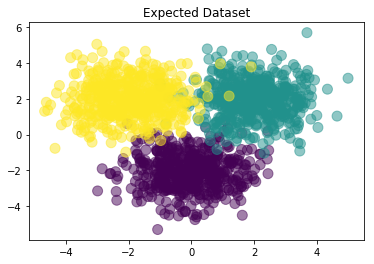

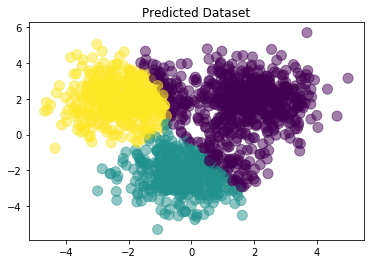

Classification rate for randomly chosen weights: 0.332666666667
Prediction overview:  Counter({0: 682, 2: 413, 1: 405})


In [9]:
#################################
# Define number of records
#################################
N = 500

############################################################
# Create 3 sets of standard normal data with translation
############################################################
X1 = np.random.randn(N, 2) + np.array([0, -2])
X2 = np.random.randn(N, 2) + np.array([2, 2])
X3 = np.random.randn(N, 2) + np.array([-2, 2])

#################################
# Create input dataset X
# Dimension = (3N, 2)
#################################
X = np.vstack([X1, X2, X3])

############################################
# Create output dataset Y with 3 classes
# Dimension = (1, 3N)
############################################
Y = np.array([0]*N + [1]*N + [2]*N)

############################################
# Create scatterplot of expected dataset
############################################
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.title('Expected Dataset')
plt.show()

############################################
# Randomly initialize weights and biases
############################################
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

############################################
# Softmax function
############################################
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

############################################
# Determine the classification rate
############################################
def classification_rate(Y, P):
    return np.mean(P == Y)

###############################################################
# Prediction based on max probablity among all classes
###############################################################
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

############################################
# Verify dimensional calculation is correct 
############################################
assert(len(P) == len(Y))

##############################################
# Create scatterplot of predicted dataset
##############################################
plt.scatter(X[:,0], X[:,1], c=P, s=100, alpha=0.5)
plt.title('Predicted Dataset')
plt.show()

print("Classification rate for randomly chosen weights:", classification_rate(Y, P))
print("Prediction overview: ", Counter(P))

## Ecommerce - Predict user actions (Random weights & biases)
Use ecommerce data with columns:
* is_mobile	
* n_products_viewed	
* visit_duration	
* is_returning_visitor	
* time_of_day	user_action

In [3]:
################
# Import data
################
df = pd.read_csv('data/ecommerce_data.csv')
df.head(10)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
5,1,1,0.512447,1,1,2
6,0,0,1.440327,1,1,0
7,1,0,0.035260,0,3,0
8,0,1,1.490764,0,0,1
9,0,0,0.005838,1,3,0


In [4]:
############################################################
# Perform one hot encoding on categorial column (Manual way)
############################################################

# for t in set(df['time_of_day']):
#     df[f'time_of_day_{t}'] = 0
    
# for index, row in df.iterrows():
#     t = int(row['time_of_day'])
#     df.loc[index, f'time_of_day_{t}'] = 1

# del df['time_of_day']
# df.head(10)

############################################################
# Perform one hot enconding using pandas get_dummies
############################################################

def one_hot_enconding(df, col):
    df_indicator = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_indicator], axis=1)
    del df[col]
    return df

df = one_hot_enconding(df, 'time_of_day')
df.head(10)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,user_action,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3
0,1,0,0.657510,0,0,0,0,0,1
1,1,1,0.568571,0,1,0,0,1,0
2,1,0,0.042246,1,0,0,1,0,0
3,1,1,1.659793,1,2,0,1,0,0
4,0,1,2.014745,1,2,0,1,0,0
5,1,1,0.512447,1,2,0,1,0,0
6,0,0,1.440327,1,0,0,1,0,0
7,1,0,0.035260,0,0,0,0,0,1
8,0,1,1.490764,0,1,1,0,0,0
9,0,0,0.005838,1,0,0,0,0,1


In [5]:
#################################
# Standardize numeric columns 
#################################
def normalize(s):
    return (s - s.mean())/s.std()

df['n_products_viewed'] = normalize(df['n_products_viewed'])
df['visit_duration'] = normalize(df['visit_duration'])
df.head(10)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,user_action,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3
0,1,-0.816161,-0.407869,0,0,0,0,0,1
1,1,0.139531,-0.498929,0,1,0,0,1,0
2,1,-0.816161,-1.037804,1,0,0,1,0,0
3,1,0.139531,0.618313,1,2,0,1,0,0
4,0,0.139531,0.981728,1,2,0,1,0,0
5,1,0.139531,-0.556391,1,2,0,1,0,0
6,0,-0.816161,0.393614,1,0,0,1,0,0
7,1,-0.816161,-1.044956,0,0,0,0,0,1
8,0,0.139531,0.445254,0,1,1,0,0,0
9,0,-0.816161,-1.075080,1,0,0,0,0,1


In [6]:
########################
# Define input data Y
########################
Y = df['user_action'].as_matrix()
Y[:10]

array([0, 1, 0, 2, 2, 2, 0, 0, 1, 0], dtype=int64)

In [7]:
########################
# Define input data X
########################
del df['user_action']
X = df.as_matrix()
X[:10]

array([[ 1.        , -0.81616102, -0.4078692 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.13953104, -0.49892862,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [ 1.        , -0.81616102, -1.03780386,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.13953104,  0.61831326,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.13953104,  0.98172839,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.13953104, -0.55639072,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.        , -0.81616102,  0.39361389,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 1.        , -0.81616102, -1.0449562 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.13953104

In [8]:
###############################
# Randomly initialize weights
###############################
M = 5
D = X.shape[1]
K = len(set(Y))
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

####################
# Make predictions
####################
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2)

P_Y_given_X = forward(X, W1, b1, W2, b2)
predictions = np.argmax(P_Y_given_X, axis=1)

#############################
# Calculate the accuracy
#############################
def classification_rate(Y, P):
    return np.mean(Y == P)

print("Classification rate:", classification_rate(Y, predictions))

Classification rate: 0.302
